In [2]:
# load necessary libraries
from IPython.display import Image
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(6,6)}) 

import warnings
warnings.simplefilter("ignore")

In [2]:
from sklearn import datasets
boston = datasets.load_boston()

In [3]:
df = pd.DataFrame(boston["data"], columns=boston["feature_names"])
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
# TARGET: medv
# median value of owner-occupied homes in $1000s.
df["MedV"] = boston["target"] #target contains output
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MedV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2, random_state=42)
# train_test_split is function for the training/test split
# test_size parameter determines size of set, in this case it is 20%
# random_state

print('Training set has', train.shape[0], 'rows')
print('Test set has', test.shape[0], 'rows')

Training set has 404 rows
Test set has 102 rows


### Simple Linear Regression

In [6]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [7]:
model.fit(X=train[["B"]], y=train["MedV"])

LinearRegression()

In [10]:
print("Model Intercept:", model.intercept_, '\n')
print("Model Coefficient:",model.coef_,'\n')

Model Intercept: 10.453896028269915 

Model Coefficient: [0.03464325] 



In [1]:
fig = plt.figure(figsize=(20, 5))
ax = fig.add_subplot(111)
ax.plot(x=train[["B"]], y)
sns.regplot(x=train[["B"]], y=train["MedV"],ax=ax)

#plt.savefig('Bcolumn_TrainingData.png')

SyntaxError: positional argument follows keyword argument (<ipython-input-1-7a05d41618ee>, line 3)

In [11]:
y_pred = model.predict(test[['B']])
y_pred

array([24.15530026, 24.2038008 , 23.96857316, 23.99628775, 23.79466406,
       23.39869174, 23.98901267, 23.89824736, 24.14941091, 24.2038008 ,
       24.2038008 , 23.85078612, 13.51185545, 23.84004671, 24.00390927,
       23.43402785, 23.59685111, 23.37305574, 24.11130333, 24.2038008 ,
       24.2038008 , 24.2038008 , 22.93135434, 24.03370246, 21.53904224,
       22.66841209, 24.17470048, 10.68531292, 24.07735295, 24.2038008 ,
       24.2038008 , 24.2038008 , 24.2038008 , 23.64569809, 21.93085736,
       19.52869461, 24.06280279, 24.2038008 , 23.66405901, 23.52028954,
       24.2038008 , 24.2038008 , 23.98381618, 24.2038008 , 24.04028468,
       24.11823198, 22.88285379, 23.74754924, 24.2038008 , 24.2038008 ,
       24.2038008 , 24.04201684, 24.2038008 , 24.15807172, 23.97515537,
       23.91695472, 24.16188247, 24.2038008 , 24.2038008 , 23.93462277,
       24.15807172, 24.17019685, 23.63010863, 20.46544801, 23.29891919,
       24.2038008 , 24.03335603, 24.2038008 , 24.15980388, 10.81

In [12]:
np.mean((test['MedV'] - y_pred)**2) # mean squared error, manually have done

68.31741207661825

In [13]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [14]:
print("Mean Squared Error:", mean_squared_error(y_true=test['MedV'], y_pred=y_pred), '\n')
print("Mean Absolute Error:",mean_absolute_error(y_true=test['MedV'], y_pred=y_pred),'\n')
print("r^2 score:",r2_score(y_true=test['MedV'], y_pred=y_pred),'\n')

Mean Squared Error: 68.31741207661821 

Mean Absolute Error: 5.993907798072553 

r^2 score: 0.06840464063797047 



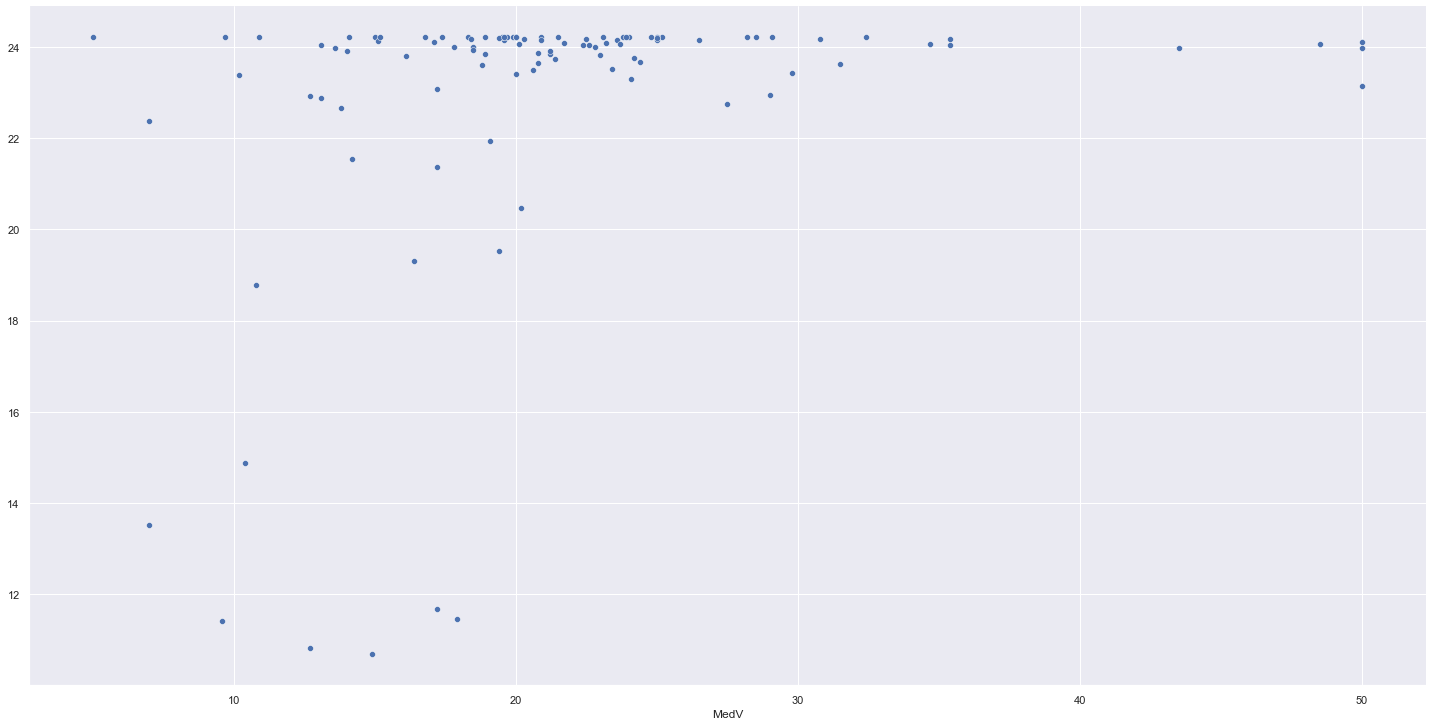

In [15]:
sns.relplot(x=test['MedV'], y=y_pred,ax=ax,height=10, aspect=20/10)
plt.savefig('Bcolumn_MedVandPred.png')

In [1]:
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(10)
plt.scatter(test['MedV'],y_pred)
plt.title("Median Values vs B")
plt.xlabel("Median Values")
plt.ylabel("B")
#plt.savefig('Predicted vs residuals_XGB.png')
plt.show()

NameError: name 'plt' is not defined